In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snsb

In [280]:
dt = pd.read_csv('/content/customer_churn_dataset-testing-master.csv')
test_data = pd.read_csv('/content/customer_churn_dataset-testing-master.csv')

In [281]:
dt.head(7)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
5,6,30,Male,41,14,10,10,Premium,Monthly,500,29,0
6,7,47,Female,37,15,9,28,Basic,Quarterly,574,14,1


In [282]:
dt.shape


(64374, 12)

In [283]:
len(dt)

64374

In [284]:
dt.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [285]:
dt.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [286]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [287]:
dt['Gender'].replace(['Female', 'Male'], [0, 1], inplace=True)

In [288]:
dt['Subscription Type'].value_counts()

Subscription Type
Standard    21502
Basic       21451
Premium     21421
Name: count, dtype: int64

In [289]:
dt['Contract Length'].value_counts()

Contract Length
Monthly      22130
Annual       21410
Quarterly    20834
Name: count, dtype: int64

In [290]:
from sklearn.preprocessing import LabelEncoder

In [291]:
label_encoder = LabelEncoder()

In [292]:
dt['Subscription Type'] =  label_encoder.fit_transform(dt['Subscription Type'])

In [293]:
dt['Contract Length'] = label_encoder.fit_transform(dt['Contract Length'])

In [294]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   CustomerID         64374 non-null  int64
 1   Age                64374 non-null  int64
 2   Gender             64374 non-null  int64
 3   Tenure             64374 non-null  int64
 4   Usage Frequency    64374 non-null  int64
 5   Support Calls      64374 non-null  int64
 6   Payment Delay      64374 non-null  int64
 7   Subscription Type  64374 non-null  int64
 8   Contract Length    64374 non-null  int64
 9   Total Spend        64374 non-null  int64
 10  Last Interaction   64374 non-null  int64
 11  Churn              64374 non-null  int64
dtypes: int64(12)
memory usage: 5.9 MB


In [295]:
value_count = dt['Churn'].value_counts()
value_count

Churn
0    33881
1    30493
Name: count, dtype: int64

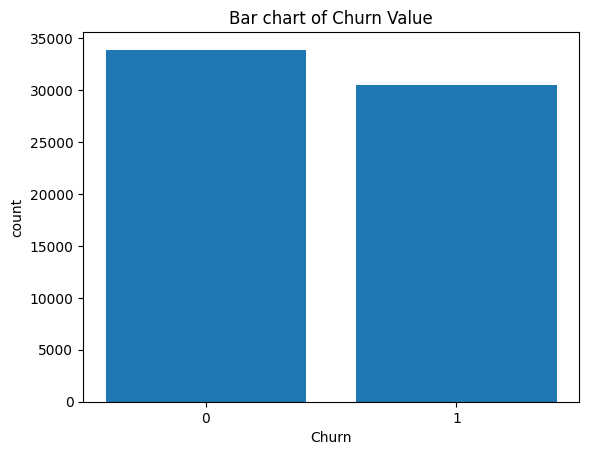

In [296]:
plt.bar(value_count.index,value_count.values)
plt.xlabel('Churn')
plt.ylabel('count')
plt.title('Bar chart of Churn Value')
plt.xticks([0,1])
plt.show()

In [297]:
dt.describe()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,0.466353,31.994827,15.080234,5.400690,17.133952,1.000792,0.991052,541.023379,15.498850,0.473685
std,18583.317451,13.924911,0.498870,17.098234,8.816470,3.114005,8.852211,0.816854,0.810036,260.874809,8.638436,0.499311
min,1.000000,18.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,0.000000,18.000000,7.000000,3.000000,10.000000,0.000000,0.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,0.000000,33.000000,15.000000,6.000000,19.000000,1.000000,1.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,1.000000,47.000000,23.000000,8.000000,25.000000,2.000000,2.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,1.000000,60.000000,30.000000,10.000000,30.000000,2.000000,2.000000,1000.000000,30.000000,1.000000


In [298]:
dt.drop(['CustomerID', 'Tenure', 'Support Calls','Usage Frequency','Payment Delay'], axis=1, inplace=True)

In [299]:
dt.head(7)

,Age,Gender,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,0,0,1,598,9,1
1,41,0,2,1,584,20,0
2,47,1,1,0,757,21,0
3,35,1,1,2,232,18,0
4,53,0,2,0,533,18,0
5,30,1,1,1,500,29,0
6,47,0,0,2,574,14,1


In [300]:
label = dt['Churn']

In [301]:
label

0        1
1        0
2        0
3        0
4        0
        ..
64369    1
64370    1
64371    1
64372    1
64373    1
Name: Churn, Length: 64374, dtype: int64

In [302]:
dt

,Age,Gender,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,0,0,1,598,9,1
1,41,0,2,1,584,20,0
2,47,1,1,0,757,21,0
3,35,1,1,2,232,18,0
4,53,0,2,0,533,18,0
...,...,...,...,...,...,...,...
64369,45,0,0,2,947,14,1
64370,37,1,2,0,923,9,1
64371,25,1,1,1,327,20,1
64372,50,0,2,1,540,13,1


In [303]:
dt.drop(['Churn'], axis=1)

,Age,Gender,Subscription Type,Contract Length,Total Spend,Last Interaction
0,22,0,0,1,598,9
1,41,0,2,1,584,20
2,47,1,1,0,757,21
3,35,1,1,2,232,18
4,53,0,2,0,533,18
...,...,...,...,...,...,...
64369,45,0,0,2,947,14
64370,37,1,2,0,923,9
64371,25,1,1,1,327,20
64372,50,0,2,1,540,13


In [304]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score
from sklearn import metrics

In [305]:
len(dt)

64374

In [306]:
x_train, x_test, y_train, y_test = train_test_split(dt, label, test_size=0.2)

In [307]:
len(x_train), len(x_test)

(51499, 12875)

In [308]:
print(y_train.shape)

(51499,)


In [309]:
0.2*64374

12874.800000000001

In [310]:
model = LogisticRegression()

In [311]:
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [312]:
predicted = model.predict(x_test)

In [313]:
accuracy_score(predicted, y_test)

1.0

In [314]:
f1 = metrics.f1_score(y_test, predicted)
f1

1.0

In [315]:
precision = precision_score(y_test, predicted)
precision

1.0

In [316]:
print(x_train.columns)


Index(['Age', 'Gender', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction', 'Churn'],
      dtype='object')


In [317]:
print(x_train.head())

       Age  Gender  Subscription Type  Contract Length  Total Spend  \
47415   58       0                  2                1          294   
47332   45       0                  2                1          737   
16469   34       0                  2                2          436   
23153   50       1                  0                1          162   
34505   63       0                  1                1          794   

       Last Interaction  Churn  
47415                 9      1  
47332                17      1  
16469                20      0  
23153                29      1  
34505                 8      0  


In [318]:
print("Number of features: ", len(x_train.columns))

Number of features:  7


In [319]:
test_data.head(5)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [320]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [321]:
test_data['Gender'].replace(['Female', 'Male'], [0, 1], inplace=True)

In [322]:
test_data['Subscription Type'] =  label_encoder.fit_transform(test_data['Subscription Type'])

In [323]:
test_data['Contract Length'] = label_encoder.fit_transform(test_data['Contract Length'])

In [324]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   CustomerID         64374 non-null  int64
 1   Age                64374 non-null  int64
 2   Gender             64374 non-null  int64
 3   Tenure             64374 non-null  int64
 4   Usage Frequency    64374 non-null  int64
 5   Support Calls      64374 non-null  int64
 6   Payment Delay      64374 non-null  int64
 7   Subscription Type  64374 non-null  int64
 8   Contract Length    64374 non-null  int64
 9   Total Spend        64374 non-null  int64
 10  Last Interaction   64374 non-null  int64
 11  Churn              64374 non-null  int64
dtypes: int64(12)
memory usage: 5.9 MB


In [325]:
print(test_data.shape)

(64374, 12)


In [326]:
 test_data.drop(['Usage Frequency', 'Tenure','CustomerID','Payment Delay','Support Calls'], axis=1, inplace=True)

In [327]:
len(X_test)

64374

In [328]:
test_data.head(5)

,Age,Gender,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,0,0,1,598,9,1
1,41,0,2,1,584,20,0
2,47,1,1,0,757,21,0
3,35,1,1,2,232,18,0
4,53,0,2,0,533,18,0


In [329]:
X_test = test_data

In [330]:
y_test = test_data['Churn']

In [331]:
y_pred = model.predict(X_test)

In [332]:
accuracy = accuracy_score(y_test, y_pred)

In [333]:
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Accuracy: 100.00%


In [334]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
from sklearn import metrics

In [335]:
len(dt)

64374

In [336]:
x_train, x_test, y_train, y_test = train_test_split(dt, label, test_size=0.2)

In [337]:
model = GaussianNB()

In [338]:
model.fit(x_train, y_train)

GaussianNB()

In [339]:
predictions = model.predict(x_test)

In [340]:
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

In [341]:
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [342]:
f1 = metrics.f1_score(y_test, predictions)
f1

1.0

In [343]:
precision = precision_score(y_test, predictions)
precision

1.0

In [344]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score
from sklearn import metrics

In [345]:
len(dt)

64374

In [346]:
len(x_train), len(x_test)

(51499, 12875)

In [347]:
x_train, x_test, y_train, y_test = train_test_split(dt, label, test_size=0.2)

In [348]:
model = SVC(kernel='linear',C=1.0, random_state=42)
model.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [349]:
model_prediction = model.predict(x_test)

In [350]:
model_prediction

array([0, 1, 1, ..., 0, 1, 1])

In [351]:
len(model_prediction)

12875

In [352]:
y_test

40671    0
30677    1
26707    1
18714    1
17916    0
        ..
37744    1
15026    1
15523    0
26292    1
60831    1
Name: Churn, Length: 12875, dtype: int64

In [353]:
accuracy = accuracy_score(y_test, model_prediction)
print(f'The accuracy of the model is {accuracy*100}%')

The accuracy of the model is 100.0%


In [354]:
f1 = metrics.f1_score(y_test, model_prediction)
f1

1.0

In [355]:
precision = precision_score(y_test, model_prediction)
precision

1.0

In [356]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score

In [357]:
x_train, x_test, y_train, y_test = train_test_split(dt, label, test_size=0.2)

In [358]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

In [359]:
random_forest.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [360]:
predicts = random_forest.predict(x_test)

In [361]:
accuracy = accuracy_score(y_test, predicts)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [362]:
train_predictions = model.predict(x_train)

In [363]:
train_accuracy = accuracy_score(y_train, train_predictions)

print(f"Model accuracy on train data: {train_accuracy * 100:.2f}%")

Model accuracy on train data: 100.00%


In [364]:
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [365]:
x_train, x_test, y_train, y_test = train_test_split(dt, label, test_size=0.2)

In [366]:
classifier = DecisionTreeClassifier()

In [367]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [368]:
y_pred = classifier.predict(x_test)

In [369]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [370]:
f1 = metrics.f1_score(y_test, y_pred)
f1

1.0

In [371]:
precision = precision_score(y_test, y_pred)
precision

1.0